In [ ]:
import pandas as pd

# Load one file to see the structure
df_sample = pd.read_csv('MFP May 25.csv')  # Use your exact filename

print("🔍 COLUMN INSPECTION")
print("=" * 30)
print(f"Columns in your data:")
for i, col in enumerate(df_sample.columns):
    print(f"{i+1:2d}. {col}")

print(f"\n📊 Sample data:")
print(df_sample.head())

print(f"\n🔢 Data types:")
print(df_sample.dtypes)

🔍 COLUMN INSPECTION
Columns in your data:
 1. Date
 2. Item
 3. Quantity Sold
 4. Amount Inc Tax
 5. Tax Rate
 6. Category
 7. Type
 8. Sold By
 9. Sold To
10. Late Payment

📊 Sample data:
               Date                      Item  Quantity Sold  Amount Inc Tax  \
0  31/05/2025 18:27  Train With A Friend PAYG              1           12.00   
1  31/05/2025 16:07               Smart Saver              1           10.80   
2  31/05/2025 15:35             PT pack- PAYG              1           17.50   
3  31/05/2025 14:35               Smart Saver              1            8.64   
4  31/05/2025 09:48               Smart Saver              1            8.64   

   Tax Rate     Category      Type     Sold By               Sold To  \
0        20  CREDIT_PACK  PURCHASE  Unassisted               Alex HA   
1        20  CREDIT_PACK  PURCHASE  Unassisted   Daniella Nistorwood   
2        20  CREDIT_PACK  PURCHASE  Unassisted  Luciana Magnocavallo   
3        20  CREDIT_PACK  PURCHASE  Unassi

In [ ]:
import pandas as pd
import glob

print("🧹 CLEANING AND COMBINING YOUR GYM DATA")
print("=" * 40)

# Columns we want for business analysis
columns_to_keep = [
    'Date',
    'Item',
    'Quantity Sold',
    'Amount Inc Tax',
    'Category',
    'Type'
]

# Find all CSV files and combine them
csv_files = glob.glob("*.csv")
all_data = []

for file in csv_files:
    df = pd.read_csv(file)
    df_clean = df[columns_to_keep].copy()  # Keep only what we need
    df_clean['Source_File'] = file  # Track which month
    all_data.append(df_clean)
    print(f"✅ Cleaned {file}: {len(df_clean)} transactions")

# Combine all cleaned data
df_final = pd.concat(all_data, ignore_index=True)

print(f"\n🎯 FINAL CLEAN DATASET:")
print(f"   • Total transactions: {len(df_final):,}")
print(f"   • Total revenue: £{df_final['Amount Inc Tax'].sum():,.2f}")
print(f"   • Columns: {list(df_final.columns)}")
print(f"\n📊 Preview:")
print(df_final.head())

🧹 CLEANING AND COMBINING YOUR GYM DATA
✅ Cleaned MFP Feb 25.csv: 191 transactions
✅ Cleaned MFP June 25.csv: 244 transactions
✅ Cleaned MFP Jun 25.csv: 248 transactions
✅ Cleaned MFP Jan 25.csv: 272 transactions
✅ Cleaned MFP Apr 25.csv: 210 transactions
✅ Cleaned MFP MArch 25.csv: 207 transactions
✅ Cleaned MFP May 25.csv: 244 transactions

🎯 FINAL CLEAN DATASET:
   • Total transactions: 1,616
   • Total revenue: £36,666.26
   • Columns: ['Date', 'Item', 'Quantity Sold', 'Amount Inc Tax', 'Category', 'Type', 'Source_File']

📊 Preview:
               Date                    Item  Quantity Sold  Amount Inc Tax  \
0  28/02/2025 16:43             Smart Saver            1.0            10.8   
1  28/02/2025 16:43     Train With A Friend            1.0            12.0   
2  28/02/2025 16:09  10 Sessions Per Month.            1.0            80.0   
3  28/02/2025 13:42              Train Solo            1.0            13.5   
4  28/02/2025 04:00              Smart Save            1.0          

🎨 CREATING YOUR BUSINESS CHARTS


/tmp/ipython-input-3-223910313.py:33: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


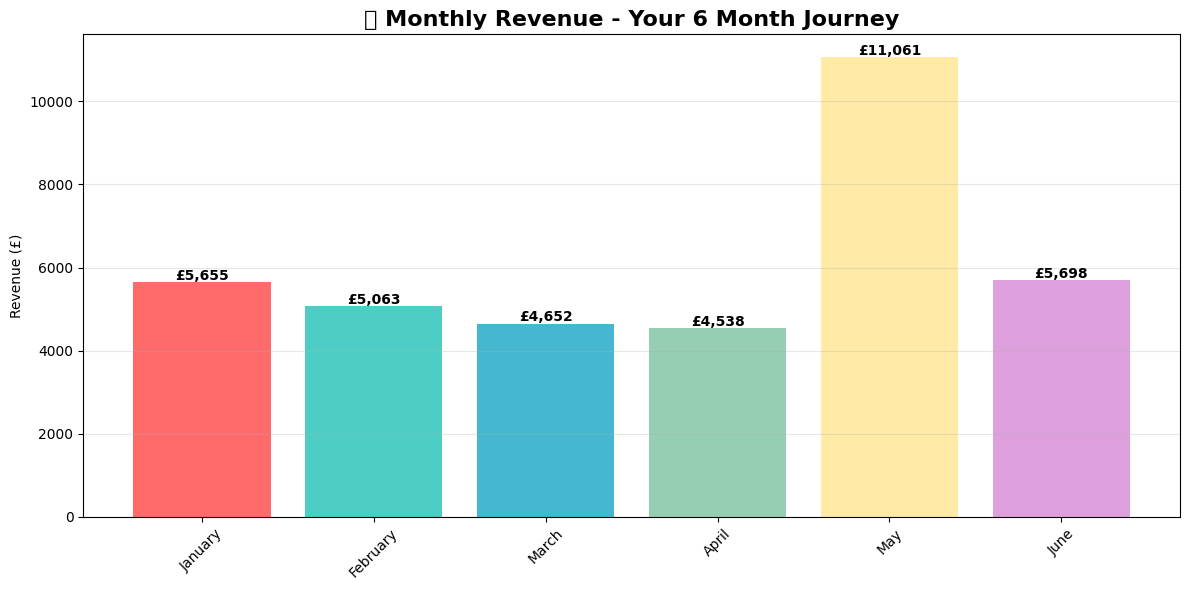

🏆 Best month: May (£11,060.70)
📉 Lowest month: April (£4,537.73)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime so we can work with months/days
df_final['Date'] = pd.to_datetime(df_final['Date'], dayfirst=True)
df_final['Month'] = df_final['Date'].dt.month_name()
df_final['Weekday'] = df_final['Date'].dt.day_name()

print("🎨 CREATING YOUR BUSINESS CHARTS")
print("=" * 35)

# CHART 1: Monthly Revenue
monthly_revenue = df_final.groupby('Month')['Amount Inc Tax'].sum()
# Put months in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_revenue = monthly_revenue.reindex(month_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_revenue.index, monthly_revenue.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

plt.title('💰 Monthly Revenue - Your 6 Month Journey', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)

# Add money amounts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'£{height:,.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🏆 Best month: {monthly_revenue.idxmax()} (£{monthly_revenue.max():,.2f})")
print(f"📉 Lowest month: {monthly_revenue.idxmin()} (£{monthly_revenue.min():,.2f})")

In [ ]:
# DEBUG: Let's see what's in each month
print("🔍 DEBUGGING: Revenue by source file")
print("=" * 40)

# Check revenue by original file
file_breakdown = df_final.groupby('Source_File')['Amount Inc Tax'].sum().sort_index()
for file, revenue in file_breakdown.items():
    print(f"📁 {file}: £{revenue:,.2f}")

print(f"\n🔍 DEBUGGING: Dates in your data")
print("=" * 40)
print(f"Date range: {df_final['Date'].min()} to {df_final['Date'].max()}")

# Let's see what months pandas thinks we have
month_counts = df_final['Month'].value_counts()
print(f"\n📊 Transactions by month (as pandas sees it):")
for month, count in month_counts.items():
    revenue = df_final[df_final['Month'] == month]['Amount Inc Tax'].sum()
    print(f"   {month}: {count} transactions, £{revenue:,.2f}")

# Check a few sample dates to see if they're parsing correctly
print(f"\n📅 Sample dates from your data:")
print(df_final[['Date', 'Month', 'Source_File']].head(10))

🔍 DEBUGGING: Revenue by source file
📁 MFP Apr 25.csv: £4,537.73
📁 MFP Feb 25.csv: £5,062.66
📁 MFP Jan 25.csv: £5,655.00
📁 MFP Jun 25.csv: £5,698.50
📁 MFP June 25.csv: £5,530.35
📁 MFP MArch 25.csv: £4,651.67
📁 MFP May 25.csv: £5,530.35

🔍 DEBUGGING: Dates in your data
Date range: 2025-01-01 00:59:00 to 2025-06-30 21:39:00

📊 Transactions by month (as pandas sees it):
   May: 488 transactions, £11,060.70
   January: 272 transactions, £5,655.00
   June: 248 transactions, £5,698.50
   April: 210 transactions, £4,537.73
   March: 207 transactions, £4,651.67
   February: 191 transactions, £5,062.66

📅 Sample dates from your data:
                 Date     Month     Source_File
0 2025-02-28 16:43:00  February  MFP Feb 25.csv
1 2025-02-28 16:43:00  February  MFP Feb 25.csv
2 2025-02-28 16:09:00  February  MFP Feb 25.csv
3 2025-02-28 13:42:00  February  MFP Feb 25.csv
4 2025-02-28 04:00:00  February  MFP Feb 25.csv
5 2025-02-28 02:23:00  February  MFP Feb 25.csv
6 2025-02-28 02:22:00  February 

In [ ]:
# Let's look at just the May file data
may_data = df_final[df_final['Source_File'].str.contains('May', case=False)]

print("🔍 INVESTIGATING MAY DATA")
print("=" * 30)
print(f"May file transactions: {len(may_data)}")
print(f"May file revenue: £{may_data['Amount Inc Tax'].sum():,.2f}")

# Check what date range is actually in your May file
print(f"\nDate range in May file: {may_data['Date'].min()} to {may_data['Date'].max()}")

# See what months pandas thinks are in your "May" file
may_months = may_data['Month'].value_counts()
print(f"\nMonths found in your May file:")
for month, count in may_months.items():
    print(f"   {month}: {count} transactions")

# Look at some actual dates
print(f"\nFirst 10 dates from May file:")
print(may_data[['Date', 'Month']].head(10))


🔍 INVESTIGATING MAY DATA
May file transactions: 244
May file revenue: £5,530.35

Date range in May file: 2025-05-01 03:00:00 to 2025-05-31 18:27:00

Months found in your May file:
   May: 244 transactions

First 10 dates from May file:
                    Date Month
1372 2025-05-31 18:27:00   May
1373 2025-05-31 16:07:00   May
1374 2025-05-31 15:35:00   May
1375 2025-05-31 14:35:00   May
1376 2025-05-31 09:48:00   May
1377 2025-05-30 14:59:00   May
1378 2025-05-30 11:31:00   May
1379 2025-05-30 09:26:00   May
1380 2025-05-30 04:00:00   May
1381 2025-05-30 04:00:00   May


🎨 CORRECT MONTHLY REVENUE CHART


/tmp/ipython-input-6-1607195635.py:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


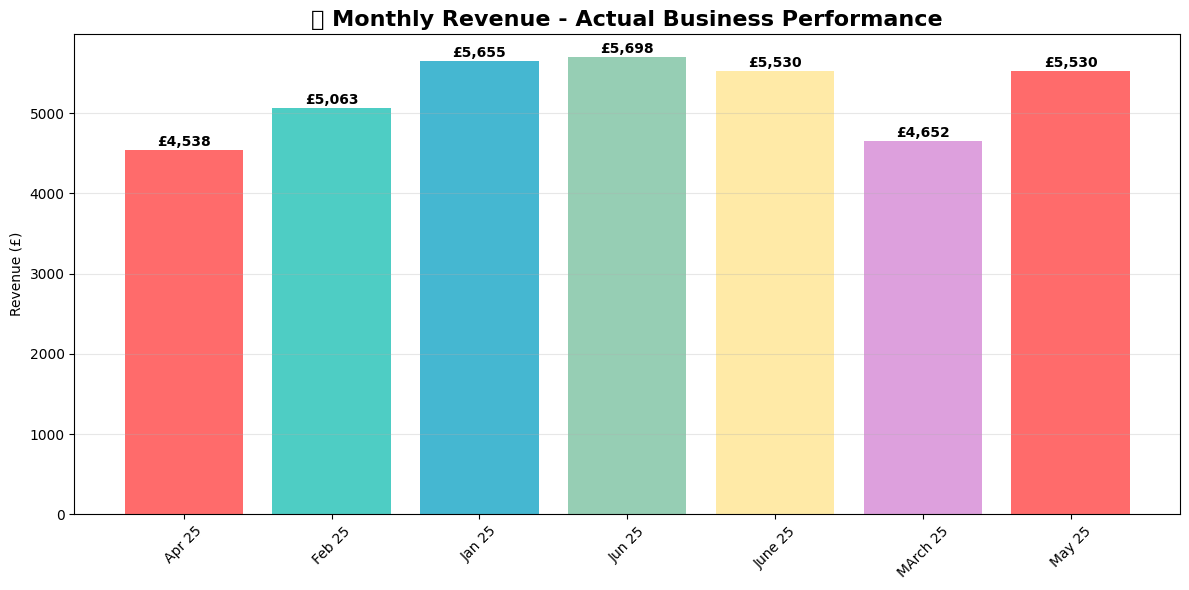

🏆 Best month: Jun 25 (£5,698.50)
📉 Lowest month: Apr 25 (£4,537.73)


In [ ]:
import matplotlib.pyplot as plt

print("🎨 CORRECT MONTHLY REVENUE CHART")
print("=" * 35)

# Revenue by actual file (which represents the real months)
file_revenue = df_final.groupby('Source_File')['Amount Inc Tax'].sum()

# Clean up file names for the chart
file_revenue.index = file_revenue.index.str.replace('.csv', '').str.replace('MFP ', '')

plt.figure(figsize=(12, 6))
bars = plt.bar(file_revenue.index, file_revenue.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

plt.title('💰 Monthly Revenue - Actual Business Performance', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)

# Add revenue amounts on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'£{height:,.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🏆 Best month: {file_revenue.idxmax()} (£{file_revenue.max():,.2f})")
print(f"📉 Lowest month: {file_revenue.idxmin()} (£{file_revenue.min():,.2f})")


📅 CHART 2: BEST DAYS OF THE WEEK


/tmp/ipython-input-7-3524347140.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


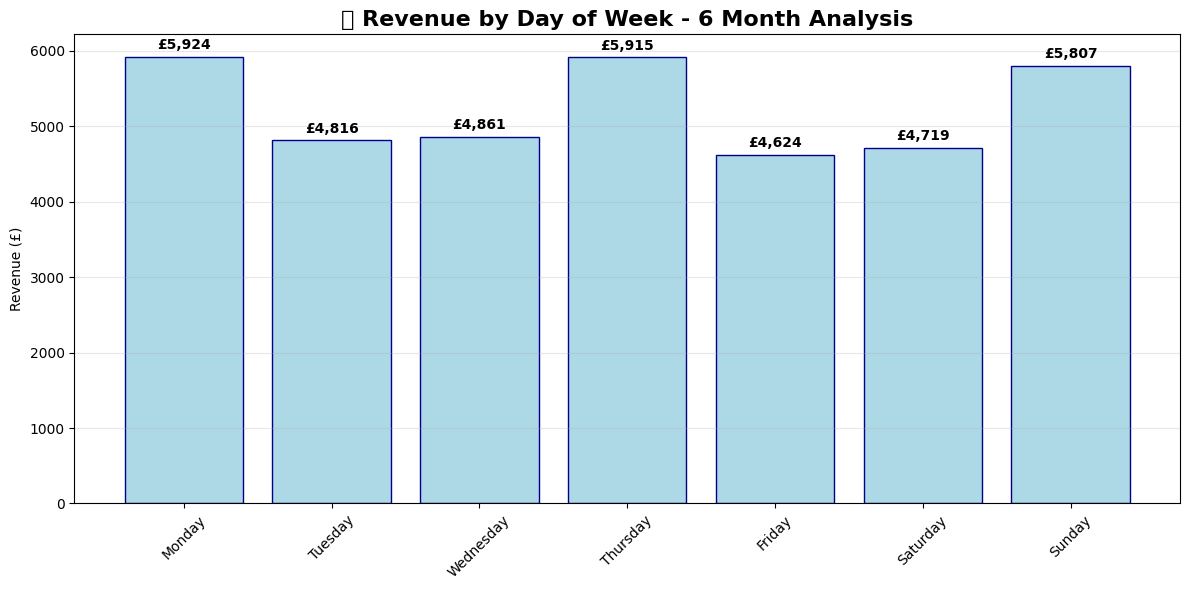

🏆 Best day: Monday (£5,924.02)
📉 Quietest day: Friday (£4,624.10)


In [ ]:
# CHART 2: Best Days of the Week
print("\n📅 CHART 2: BEST DAYS OF THE WEEK")
print("=" * 35)

# Days of week performance
day_revenue = df_final.groupby('Weekday')['Amount Inc Tax'].sum()

# Put days in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_revenue = day_revenue.reindex(day_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(day_revenue.index, day_revenue.values, color='lightblue', edgecolor='darkblue')

plt.title('📊 Revenue by Day of Week - 6 Month Analysis', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)

# Add revenue amounts on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'£{height:,.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🏆 Best day: {day_revenue.idxmax()} (£{day_revenue.max():,.2f})")
print(f"📉 Quietest day: {day_revenue.idxmin()} (£{day_revenue.min():,.2f})")


🎯 CHART 3: CATEGORY BREAKDOWN


/tmp/ipython-input-8-3934036063.py:22: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


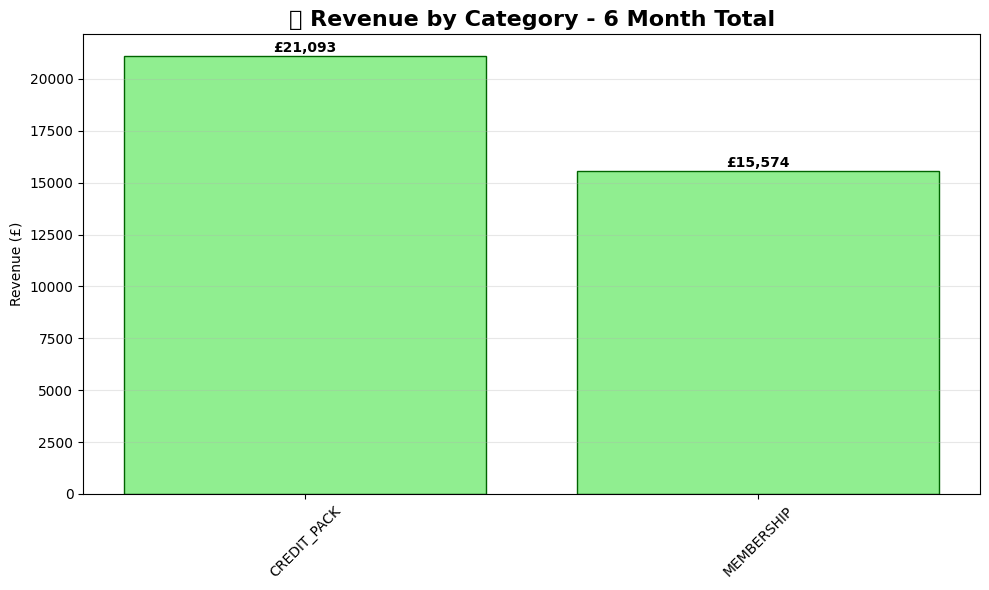


🏆 TOP CATEGORIES:
1. CREDIT_PACK: £21,092.66 (57.5% of total)
2. MEMBERSHIP: £15,573.60 (42.5% of total)


In [ ]:
# CHART 3: Top Categories Performance
print("\n🎯 CHART 3: CATEGORY BREAKDOWN")
print("=" * 35)

# Revenue by category
category_revenue = df_final.groupby('Category')['Amount Inc Tax'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(category_revenue.index, category_revenue.values, color='lightgreen', edgecolor='darkgreen')

plt.title('💰 Revenue by Category - 6 Month Total', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)

# Add revenue amounts on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 200,
             f'£{height:,.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🏆 TOP CATEGORIES:")
for i, (category, revenue) in enumerate(category_revenue.head(5).items(), 1):
    percentage = (revenue / df_final['Amount Inc Tax'].sum()) * 100
    print(f"{i}. {category}: £{revenue:,.2f} ({percentage:.1f}% of total)")

# CHART 4: Monday Myst